Klasy 4
* backward
* forward
* left
* right
['backward' 'forward' 'left' 'right']
Shuffle seed:  4267
(1984, 100, 150, 3)
forward


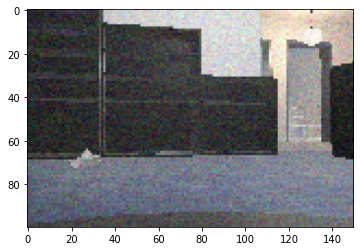

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 100, 150, 64)      1792      
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 100, 150, 32)      18464     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 50, 75, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 50, 75, 32)        9248      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 50, 75, 16)        4624      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 25, 37, 16)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 25, 37, 16)       

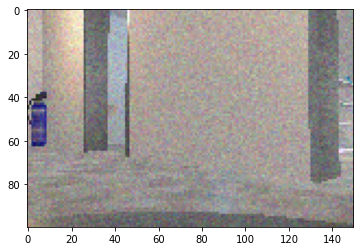

In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow_core.python.keras.utils.np_utils import to_categorical


#tu moje foldery zostawione

DIRECTORY = r'D:\Informatyka\data'
classes = []
for fold in os.scandir(DIRECTORY):
    if os.path.isdir(fold):
        classes.append(fold.name)

classes = np.array(classes, dtype=object)
n_classes = len(classes)

print('Klasy', n_classes)
for label in classes:
    print('*', label)

print(classes)
data_list = []
category_list = []
for fold in os.scandir(DIRECTORY):
    if os.path.isdir(fold):
        for entry in os.scandir(fold):
            if entry.path.endswith('.png') and entry.is_file():
                try:
                    file_data = cv2.imread(entry.path)
                    category = np.where(classes == fold.name)
                    category_list.append(category[0][0])
                    data_list.append(file_data)
                except Exception:
                    pass

images = np.array(data_list, dtype=int)
categories = np.array(category_list, dtype=int)

SEED = np.random.randint(0, 10000)
print('Shuffle seed: ', SEED)

np.random.seed(SEED)
np.random.shuffle(images)
np.random.seed(SEED)
np.random.shuffle(categories)

plt.imshow(images[0])
print(images.shape)
print(classes[categories[0]])
plt.show()

images = images/255.0
categories = to_categorical(categories, n_classes)

train_images = images[:1900]
train_categories = categories[:1900]

test_images = images[-84:]
test_categories = categories[-84:]

model = Sequential()
model.add(Conv2D(64,(3, 3), padding='same',activation='relu', input_shape=(100, 150, 3)))
model.add(Conv2D(32,(3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3, 3), padding='same',activation='relu'))
model.add(Conv2D(16,(3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,(3, 3), padding='same',activation='relu'))
model.add(Conv2D(8,(3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8,(3, 3), padding='same',activation='relu'))
model.add(Conv2D(4,(3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_categories, batch_size=32, epochs=25)
model_json = model.to_json()
with open('models/model_architecture.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('models/model_weights.h5')

test_loss, test_acc = model.evaluate(test_images, test_categories, verbose=2)
print('Test accuracy:', test_acc)

y_pred = model.predict(test_images)
y_true = test_categories

id_sample = 0
plt.imshow(test_images[id_sample])
print('Klasa ', classes[np.argmax(y_true[id_sample])])
print('Klasyfikacja ', classes[np.argmax(y_pred[id_sample])])
plt.show()